# Credit Card Fraud Detection

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
pd.options.display.max_columns = None

# 1. Display Top 5 Rows of The Dataset

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. Check Last 5 Rows of The Dataset

In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [7]:
data.shape

(284807, 31)

In [8]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


# 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 5. Check Null Values In The Dataset

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
data = data.drop(['Time'],axis=1)

In [15]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [16]:
data.shape

(284807, 30)

In [17]:
data.duplicated().any()

True

# Let's Remove Duplicated Values

In [18]:
data = data.drop_duplicates()

In [19]:
data.shape

(275663, 30)

In [20]:
284807- 275663

9144

# 6. Not Handling Imbalanced

In [21]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='Class', ylabel='count'>

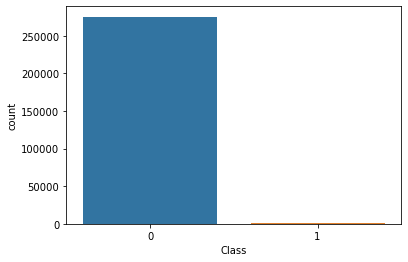

In [23]:
sns.countplot(data['Class'])

# 7. Store Feature Matrix In X And Response (Target) In Vector y

In [24]:
X = data.drop('Class',axis=1)
y = data['Class']

# 8. Splitting The Dataset Into The Training Set And Test Set

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# 9. Handling Imbalanced Dataset

# Undersampling

In [26]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [27]:
normal.shape

(275190, 30)

In [28]:
fraud.shape

(473, 30)

In [29]:
normal_sample=normal.sample(n=473)

In [30]:
normal_sample.shape

(473, 30)

In [31]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [32]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [33]:
new_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.930205,-0.354321,-0.684574,0.269837,0.366681,-0.093917,0.619650,-0.189620,-0.497088,-0.003744,0.461864,0.953368,0.964570,0.496872,0.098747,0.594027,-1.009381,-0.012312,0.815920,0.422780,-0.282698,-1.316456,-0.218160,-0.936733,0.378354,0.176297,-0.103911,0.024109,0.505759,0
1,-2.332777,-0.559689,-0.763220,-2.293940,-1.035408,-0.056900,2.539551,-0.373874,0.640753,-1.121086,0.199369,-0.137574,-1.886838,0.482222,-1.202652,0.519917,-0.862974,-0.202441,-0.142490,-1.284036,-0.474627,-0.573746,-0.152992,-0.344441,-0.233068,0.164602,-0.314332,-0.326999,1.369146,0
2,-0.847425,0.548680,2.614462,1.292848,-0.465039,0.826199,-0.364945,-0.393025,0.346527,-0.451818,-1.032182,0.960441,0.370798,-1.250659,-2.669718,-0.396882,0.544981,-1.526234,-0.950417,-0.372598,0.547419,-0.449528,0.115867,0.455806,-0.358948,0.714346,0.103306,0.033280,-0.265271,0
3,-0.182730,-3.830463,-1.003866,-0.737566,-1.855440,0.218265,0.205779,-0.179486,-2.022027,1.142339,0.767441,-0.541685,-0.452273,0.216400,-0.607839,-0.826695,0.859132,0.114653,-0.158183,1.319872,0.355265,-0.439788,-0.851760,-0.284866,0.276035,-0.118865,-0.138533,0.139048,3.117109,0
4,-9.106254,7.122497,-5.315839,-0.509634,-4.235726,1.681920,-6.276466,3.215310,0.548452,0.866069,-0.487615,3.048225,-0.841819,3.705949,-0.519482,-0.000687,3.258861,-1.272855,-1.503512,0.889268,-0.255354,0.413594,1.149340,-1.433276,0.561365,0.587026,0.348215,0.315182,-0.349231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [34]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# 10. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred1 = log.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred1)

0.9315789473684211

In [40]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [41]:
precision_score(y_test,y_pred1)

0.9587628865979382

In [42]:
recall_score(y_test,y_pred1)

0.9117647058823529

In [43]:
f1_score(y_test,y_pred1)

0.9346733668341709

# 11. Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred2 = dt.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred2)

0.9105263157894737

In [47]:
precision_score(y_test,y_pred2)

0.9381443298969072

In [48]:
recall_score(y_test,y_pred2)

0.8921568627450981

In [49]:
f1_score(y_test,y_pred2)

0.914572864321608

# 12. Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred3 = rf.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred3)

0.9315789473684211

In [53]:
precision_score(y_test,y_pred3)

0.968421052631579

In [54]:
recall_score(y_test,y_pred3)

0.9019607843137255

In [55]:
f1_score(y_test,y_pred3)

0.934010152284264

In [56]:
final_data = pd.DataFrame({'Models':['Logestic Regression','Decision Tree','Random Forest'],
              "Accuracy":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [57]:
final_data

,Models,Accuracy
0,Logestic Regression,93.157895
1,Decision Tree,91.052632
2,Random Forest,93.157895


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

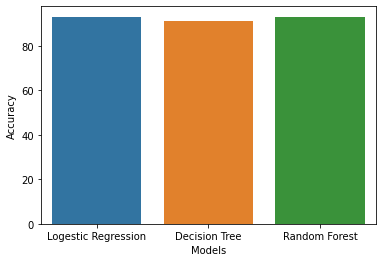

In [58]:
sns.barplot(final_data['Models'],final_data['Accuracy'])

# Oversampling

In [59]:
X = data.drop('Class',axis=1)
y = data['Class']

In [60]:
X.shape

(275663, 29)

In [61]:
y.shape

(275663,)

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [64]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

# 10. Logistic Regression

In [66]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [67]:
y_pred1 = log.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred1)

0.9450107198662742

In [69]:
precision_score(y_test,y_pred1)

0.9730748415030153

In [70]:
recall_score(y_test,y_pred1)

0.9152773485082631

In [71]:
f1_score(y_test,y_pred1)

0.9432915803970432

# 11. Decision Tree Classifier

In [72]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
y_pred2 = dt.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred2)

0.9982557505723318

In [75]:
precision_score(y_test,y_pred2)

0.9977659516501081

In [76]:
recall_score(y_test,y_pred2)

0.9987455229714742

In [77]:
f1_score(y_test,y_pred2)

0.9982554970016354

# 12. Random Forest Classifier

In [78]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
y_pred3 = rf.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred3)

0.999918238308078

In [81]:
precision_score(y_test,y_pred3)

0.9998363993310551

In [82]:
recall_score(y_test,y_pred3)

1.0

In [83]:
f1_score(y_test,y_pred3)

0.9999181929736854

In [84]:
final_data = pd.DataFrame({'Models':['Logestic Regression','Decision Tree','Random Forest'],
              "Accuracy":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [85]:
final_data

,Models,Accuracy
0,Logestic Regression,94.501072
1,Decision Tree,99.825575
2,Random Forest,99.991824


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

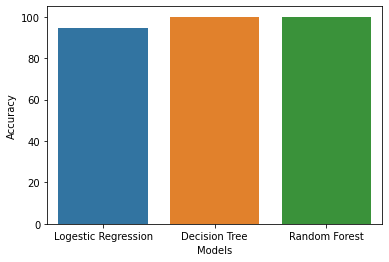

In [86]:
sns.barplot(final_data['Models'],final_data['Accuracy'])

In [87]:
# accuracy on training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [88]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [89]:
# accuracy on test data
X_test_prediction = rf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [90]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.999918238308078


# Evaluation

In [91]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [92]:
pred = rf1.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [93]:
pred

array([0])

In [94]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation


In [95]:
pred = rf1.predict([[1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,-0.183191]])

In [96]:
pred

array([1])

In [97]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Fraudulent Transcation


# Save The Model

In [98]:
import joblib

In [99]:
joblib.dump(rf1,"credit_card_model1")

['credit_card_model1']

In [100]:
model = joblib.load("credit_card_model1")